In [1]:
#import tensorflow as ts
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
#from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from keras.datasets import cifar10

In [ ]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [ ]:
#check type of the train and test
type(xtrain)

numpy.ndarray

In [ ]:
#check shape of the train and test
xtrain.shape #RGB

(50000, 32, 32, 3)

In [ ]:
len(xtrain[0].shape)

3

In [ ]:
#look a first image in array
xtrain[10]#0 to 255

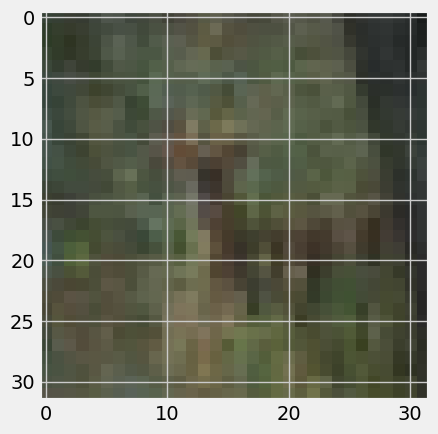

In [ ]:
img0=plt.imshow(xtrain[10])

In [ ]:
#get image label
lab1=ytrain[10]
print(lab1)

[4]


In [ ]:
ytrain[10][0]

4

In [ ]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
print('image class is:',classification[ytrain[10][0]])

image class is: deer


In [ ]:
ytest

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
#change the label into set of numbers [10]
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [ ]:
ytrain_one_hot[10]  #000100000 #000100000

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print('one hot label:',ytrain_one_hot[10])

one hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#normalize the pixels values
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
xtrain[10]

In [ ]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 1000)              8

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 131s 809ms/step - loss: 1.8136 - accuracy: 0.3225 - val_loss: 1.4696 - val_accuracy: 0.4573
Epoch 2/10
157/157 [==============================] - 113s 722ms/step - loss: 1.4422 - accuracy: 0.4768 - val_loss: 1.2686 - val_accuracy: 0.5413
Epoch 3/10
157/157 [==============================] - 102s 651ms/step - loss: 1.2779 - accuracy: 0.5411 - val_loss: 1.2253 - val_accuracy: 0.5592
Epoch 4/10
157/157 [==============================] - 75s 478ms/step - loss: 1.1688 - accuracy: 0.5802 - val_loss: 1.1252 - val_accuracy: 0.6028
Epoch 5/10
157/157 [==============================] - 105s 669ms/step - loss: 1.0938 - accuracy: 0.6095 - val_loss: 1.0678 - val_accuracy: 0.6163
Epoch 6/10
157/157 [==============================] - 98s 621ms/step - loss: 1.0095 - accuracy: 0.6380 - val_loss: 1.0078 - val_accuracy: 0.6465
Epoch 7/10
157/157 [==============================] - 78s 500ms/step - loss: 0.9492 - accuracy: 0.6639 - val_loss: 1.0158 - va

In [ ]:
model.evaluate(xtest,ytest_one_hot)

313/313 [==============================] - 12s 36ms/step - loss: 0.9388 - accuracy: 0.6727


[0.9388410449028015, 0.6726999878883362]

In [ ]:
dog=plt.imread('dog.jpg')

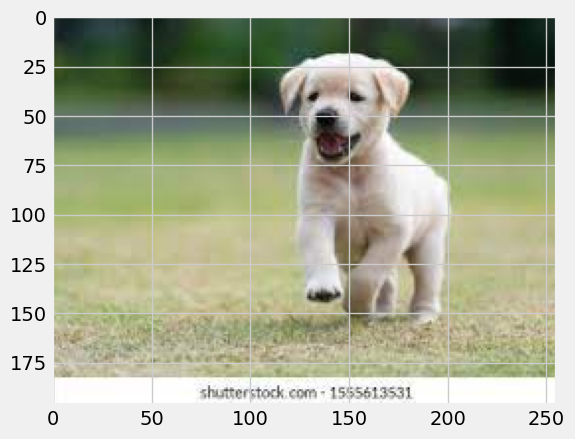

In [ ]:
img=plt.imshow(dog)

In [ ]:
#resize the image
#!pip install scikit-image
from skimage import transform

In [ ]:
resize=transform.resize(dog,(32,32,3))

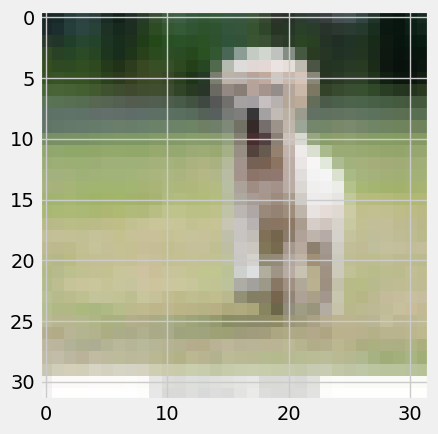

In [ ]:
img=plt.imshow(resize)

In [ ]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 1s 888ms/step
[[6.4815616e-04 1.2419024e-04 2.7288634e-01 4.5493260e-02 2.1546511e-01
  3.2246631e-01 3.3487217e-03 1.3901709e-01 8.1172839e-05 4.6958699e-04]]


In [ ]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[5, 2, 4, 7, 3, 6, 0, 9, 1, 8]


In [ ]:
for i in range(5):
        print(classification[list_index[i]])

dog
bird
deer
horse
cat


In [ ]:
car=plt.imread('images.jpg')

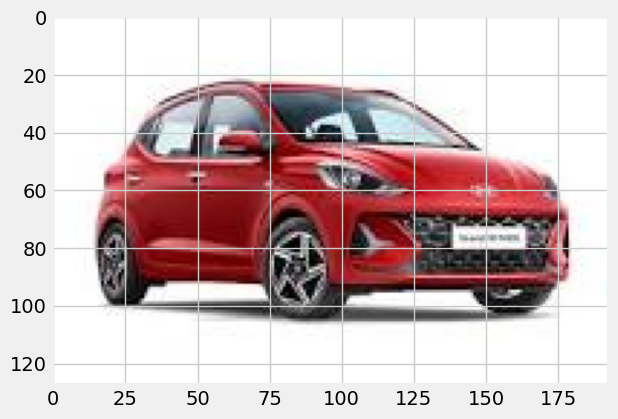

In [ ]:
img=plt.imshow(car)

In [ ]:
resize=transform.resize(car,(32,32,3))

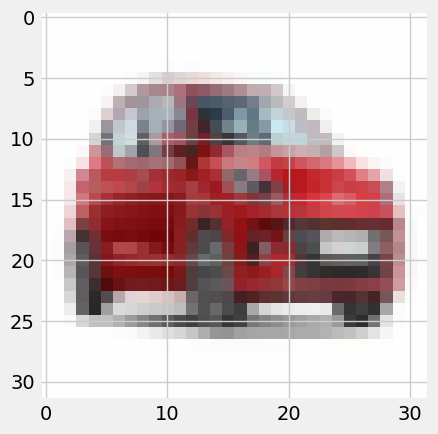

In [ ]:
img=plt.imshow(resize)

In [ ]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 220ms/step
[[5.1899889e-04 5.4217315e-01 9.3281579e-07 2.5859044e-06 2.8721067e-07
  1.0887329e-06 1.1467158e-06 5.2299731e-07 3.5735886e-04 4.5694390e-01]]


In [ ]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[1, 9, 0, 8, 3, 6, 5, 2, 7, 4]


In [ ]:
for i in range(5):
        print(classification[list_index[i]])

automobile
truck
airplane
ship
cat
